# 다중분류 - IRIS 품종예측 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

## 데이터 전처리

In [3]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving iris.csv to iris.csv


In [4]:
import pandas as pd
iris = pd.read_csv(filename, header = None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


기본적으로 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허락하지 않는다.

그렇기 때문에 모든 문자열 값들을 숫자 형으로 인코딩하는 전처리 작업 후에 머신러닝 모델에 학습을 시켜야한다.

이렇게 인코딩 하는 방식에는 크게 레이블 인코딩(Lable encoding)과 원-핫 인코딩(One Hot Encoding)이 있다.

1. Label Encoding: 일괄적인 숫자 값으로 변환
-->숫자의 크고 작음에 대한 특성이 작용해서 예측 성능이 떨어질 수 있다.
2. One-hot Encoding: 간단하게 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방법

In [5]:
# Lable Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(iris.iloc[:, -1].values) # 제일 마지막줄에 있는 것들이 y가 됨

In [6]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
y_onehot = to_categorical(y)
y_onehot[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [7]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(iris.iloc[:,:-1].values)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_onehot, stratify=y_onehot, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

## 모델 정의/설정/학습/평가

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu')) #Hidden layer
model.add(Dense(3, activation='softmax'))
model.summary()
# shape을 잘줘야함

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

In [12]:
history=model.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=30, verbose=0
)

In [13]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.3870 - accuracy: 0.9474


[0.3869674801826477, 0.9473684430122375]

## 모델 save/load

In [14]:
model.save('iris_model.h5')

In [15]:
from tensorflow.keras.models import load_model
my_model = load_model('iris_model.h5')

In [17]:
my_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.3870 - accuracy: 0.9474


[0.3869674801826477, 0.9473684430122375]

## 훈련과정 시각화

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
x_len = np.arange(len(y_acc))

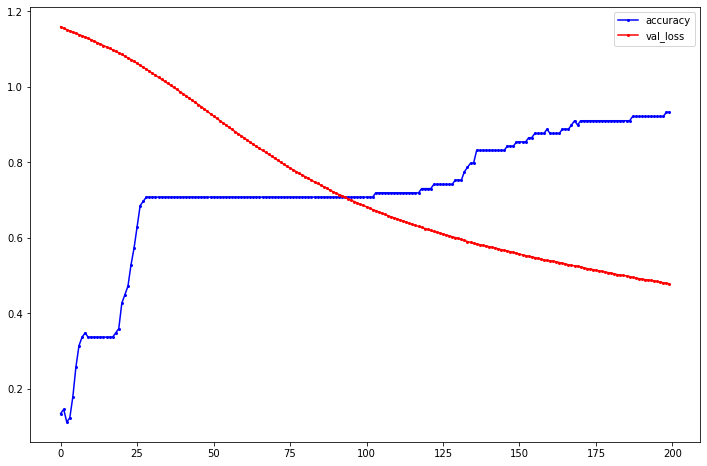

In [20]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend() 
plt.show()